# Exploratory Data Analysis (EDA)
- Categorical - mode and countplot
- Numeric - mean, median and histogram
- Numeric / Numeric - correlation, scatter
- Categorical / Categorical - pivot
- Categorical / Numeric - violin plot

## Step 0: Imports and Reading Data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

In [2]:
# Define the path to your CSV file
csv_file_path = r'data_preperation/data/usda_wheat_planted_harvested_yield_soild_weatherd_priced_2014_2022.csv'

# Load the CSV file into a dataframe
df = pd.read_csv(csv_file_path)

## Step 1: Data Understanding
- Dataframe shape
- head and tail
- dtypes
- describe

In [3]:
df.shape

(8260, 25)

In [5]:
df.head(3)

,Year,Planting_Dates,Harvesting_Dates,State,State_ANSI,Ag_District,Ag_District_Code,County,County_ANSI,Commodity,ACRES_PLANTED,ACRES_HARVESTED,YIELD_(BU/ACRE),soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close
0,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,ARKANSAS,1,WHEAT,16300,15300,73.2,22.0,0.4,1530.0,Silt loam,1746.3,0.0,286.2,5.8908,5.97,7.39,4.74,5.895
1,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CRITTENDEN,35,WHEAT,40800,37000,65.7,28.0,0.4,1590.0,Clay loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895
2,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CROSS,37,WHEAT,16600,15400,64.8,24.0,0.4,1570.0,Silt loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895


In [6]:
df.columns

Index(['Year', 'Planting_Dates', 'Harvesting_Dates', 'State', 'State_ANSI',
       'Ag_District', 'Ag_District_Code', 'County', 'County_ANSI', 'Commodity',
       'ACRES_PLANTED', 'ACRES_HARVESTED', 'YIELD_(BU/ACRE)', 'soil_water',
       'soil_carbon', 'soil_density', 'soil_type', 'gdd', 'ehdd', 'ecdd',
       'average_price', 'year_open', 'year_high', 'year_low', 'year_close'],
      dtype='object')

- Year : the year where the harvest occurred
- Planting_Dates : day and month of a crop planting 
- Harvesting_Dates : day and month of a crop harvesting
- State : the state where the crop is
- State_ANSI : state id
- Ag_District : the district of the crop
- Ag_District_Code : the district code
- County : county ofthe crop
- County_ANSI : county code
- Commodity : crop type
- ACRES_PLANTED : area planted in ACRES
- ACRES_HARVESTED : area harvested in ACRES
- YIELD_(BU/ACRE) : production in BUCHELS per ACRE
- soil_water : percentage of water in the soil in %
- soil_carbon : carbon content in the soil in Grams per KiloGram
- soil_density : soil density in KiloGrams per Metre Cube
- soil_type : soil type or class, there are 7 classes in this dataset
- gdd : 
- ehdd : 
- ecdd :
- average_price :
- year_open : 
- year_high : 
- year_low : 
- year_close : 

In [7]:
df.dtypes

Year                  int64
Planting_Dates       object
Harvesting_Dates     object
State                object
State_ANSI            int64
Ag_District          object
Ag_District_Code      int64
County               object
County_ANSI           int64
Commodity            object
ACRES_PLANTED         int64
ACRES_HARVESTED       int64
YIELD_(BU/ACRE)     float64
soil_water          float64
soil_carbon         float64
soil_density        float64
soil_type            object
gdd                 float64
ehdd                float64
ecdd                float64
average_price       float64
year_open           float64
year_high           float64
year_low            float64
year_close          float64
dtype: object

In [8]:
df.describe()

,Year,State_ANSI,Ag_District_Code,County_ANSI,ACRES_PLANTED,ACRES_HARVESTED,YIELD_(BU/ACRE),soil_water,soil_carbon,soil_density,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close
count,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000
mean,2017.774697,32.217191,49.650484,102.517554,29450.290557,23457.676755,57.752300,22.316580,0.562262,1510.169553,1778.418639,1.253300,410.570171,5.731977,5.518353,7.046118,4.855066,5.813074
std,2.653308,13.148082,25.396972,87.094491,51319.122219,44027.740099,20.087368,2.773299,0.312436,60.945556,1095.895807,6.556957,416.805824,1.495911,1.021124,2.229775,1.054392,1.506897
min,2014.000000,5.000000,10.000000,1.000000,200.000000,60.000000,3.000000,13.000000,0.200000,1200.000000,0.000000,0.000000,0.000000,4.394500,4.065000,5.195000,3.806500,4.080000
25%,2015.000000,20.000000,30.000000,43.000000,3100.000000,2250.000000,44.400000,21.000000,0.400000,1480.000000,1269.000000,0.000000,29.700000,4.941400,4.582500,5.600000,4.165000,4.700000
50%,2018.000000,31.000000,50.000000,85.000000,7700.000000,5900.000000,58.500000,23.000000,0.400000,1520.000000,1998.500000,0.000000,295.100000,5.083600,5.602500,6.155500,4.652500,5.587500
75%,2020.000000,42.000000,70.000000,139.000000,27000.000000,20200.000000,70.800000,24.000000,0.600000,1550.000000,2480.300000,0.000000,666.700000,5.890800,5.970000,7.390000,4.747000,6.405000
max,2022.000000,56.000000,96.000000,810.000000,416500.000000,410000.000000,154.500000,33.000000,2.400000,1670.000000,5195.000000,262.300000,2324.700000,9.523900,7.580000,12.940000,7.415000,8.957100


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              8260 non-null   int64  
 1   Planting_Dates    8260 non-null   object 
 2   Harvesting_Dates  8260 non-null   object 
 3   State             8260 non-null   object 
 4   State_ANSI        8260 non-null   int64  
 5   Ag_District       8260 non-null   object 
 6   Ag_District_Code  8260 non-null   int64  
 7   County            8260 non-null   object 
 8   County_ANSI       8260 non-null   int64  
 9   Commodity         8260 non-null   object 
 10  ACRES_PLANTED     8260 non-null   int64  
 11  ACRES_HARVESTED   8260 non-null   int64  
 12  YIELD_(BU/ACRE)   8260 non-null   float64
 13  soil_water        8257 non-null   float64
 14  soil_carbon       8257 non-null   float64
 15  soil_density      8257 non-null   float64
 16  soil_type         8257 non-null   object 


## Step 2: Data Preperation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [10]:
# Rename our columns
df = df.rename(columns={'Year' : 'year',
                        'Planting_Dates' : 'planting_date',
                        'Harvesting_Dates' : 'harvesting_date',
                        'State' : 'state',
                        'State_ANSI' : 'state_ansi',
                        'Ag_District' : 'ag_district',
                        'Ag_District_Code' : 'ag_district_code',
                        'County' : 'county',
                        'County_ANSI' : 'county_ansi',
                        'Commodity' : 'commodity',
                        'ACRES_PLANTED' : 'acres_planted', 
                        'ACRES_HARVESTED' : 'acres_harvested',
                        'YIELD_(BU/ACRE)' : 'yield'
                        })

In [11]:
df.head(3)

,year,planting_date,harvesting_date,state,state_ansi,ag_district,ag_district_code,county,county_ansi,commodity,acres_planted,acres_harvested,yield,soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close
0,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,ARKANSAS,1,WHEAT,16300,15300,73.2,22.0,0.4,1530.0,Silt loam,1746.3,0.0,286.2,5.8908,5.97,7.39,4.74,5.895
1,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CRITTENDEN,35,WHEAT,40800,37000,65.7,28.0,0.4,1590.0,Clay loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895
2,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CROSS,37,WHEAT,16600,15400,64.8,24.0,0.4,1570.0,Silt loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895


In [12]:
df['production'] = (df['yield'] * df['acres_harvested']) * 27.216 # in Kg

In [13]:
# Calculate a new column 'Loss_perc' based on columns 'Acres_Planted' and 'Acres_Harvested'
df['loss_perc'] = ((df['acres_planted'] - df['acres_harvested']) / df['acres_planted']).apply(lambda x: round(x, 2))

In [14]:
df['crop_health'] = 1 - df['loss_perc'] # in %

In [15]:
df['land_use'] = (df['acres_planted'] / 2.471).apply(lambda x: round(x, 2))  # in Hectares
df.head(3)

,year,planting_date,harvesting_date,state,state_ansi,ag_district,ag_district_code,county,county_ansi,commodity,acres_planted,acres_harvested,yield,soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close,production,loss_perc,crop_health,land_use
0,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,ARKANSAS,1,WHEAT,16300,15300,73.2,22.0,0.4,1530.0,Silt loam,1746.3,0.0,286.2,5.8908,5.97,7.39,4.74,5.895,30480831.36,0.06,0.94,6596.52
1,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CRITTENDEN,35,WHEAT,40800,37000,65.7,28.0,0.4,1590.0,Clay loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895,66159374.40,0.09,0.91,16511.53
2,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CROSS,37,WHEAT,16600,15400,64.8,24.0,0.4,1570.0,Silt loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895,27159390.72,0.07,0.93,6717.93


In [16]:
# Instead of yearly average price,let's use the closest price to the harvesting date
# Let's first generate the hatv and planting long dates from the year and the short dates columns

df['harvesting_long_date'] = pd.to_datetime(df['harvesting_date'] + '-' + df['year'].astype(str), format='%d-%b-%Y')
df['planting_long_date'] = pd.to_datetime(df['planting_date'] + '-' + str(df['year'][0] - 1), format='%d-%b-%Y')
df.head(3)

,year,planting_date,harvesting_date,state,state_ansi,ag_district,ag_district_code,county,county_ansi,commodity,acres_planted,acres_harvested,yield,soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close,production,loss_perc,crop_health,land_use,harvesting_long_date,planting_long_date
0,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,ARKANSAS,1,WHEAT,16300,15300,73.2,22.0,0.4,1530.0,Silt loam,1746.3,0.0,286.2,5.8908,5.97,7.39,4.74,5.895,30480831.36,0.06,0.94,6596.52,2014-07-02,2013-10-03
1,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CRITTENDEN,35,WHEAT,40800,37000,65.7,28.0,0.4,1590.0,Clay loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895,66159374.40,0.09,0.91,16511.53,2014-07-02,2013-10-03
2,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CROSS,37,WHEAT,16600,15400,64.8,24.0,0.4,1570.0,Silt loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895,27159390.72,0.07,0.93,6717.93,2014-07-02,2013-10-03


In [17]:
# then let's load the csv file that contains daily (almost daily) prices from 2000 to 2023

csv_file_path = r'data_preperation/data/wheat-prices-historical-chart-data.csv'

df_price = pd.read_csv(csv_file_path)
df_price['date'] = pd.to_datetime(df_price['date'], format='%d/%m/%y')
df_price.head(3)

,date,value
0,2000-01-03,2.4750
1,2000-01-04,2.4725
2,2000-01-05,2.4975


In [18]:
# By merging the two DFs we will have df_merged has a column named value containing wheat the closest price to the havest date

# Sort the 'harvesting_long_date' column in ascending order
df.sort_values('harvesting_long_date', inplace=True)

# Merge the dataframes based on the closest date
df_merged = pd.merge_asof(df, df_price, left_on='harvesting_long_date', right_on='date', direction='nearest')

# Drop unnecessary columns if needed
df_merged.drop(['date'], axis=1, inplace=True)


In [19]:
df_merged['yearly_income'] = df_merged['production'] * df_merged['value'] # in dollars $
df_merged.head(2)

,year,planting_date,harvesting_date,state,state_ansi,ag_district,ag_district_code,county,county_ansi,commodity,acres_planted,acres_harvested,yield,soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close,production,loss_perc,crop_health,land_use,harvesting_long_date,planting_long_date,value,yearly_income
0,2014,12-Oct,27-Jun,GEORGIA,13,SOUTH CENTRAL,80,COLQUITT,71,WHEAT,3500,1800,41.7,18.0,0.4,1550.0,Sandy loam,2113.9,0.0,24.0,5.8908,5.97,7.39,4.74,5.895,2042832.96,0.49,0.51,1416.43,2014-06-27,2013-10-12,5.9035,1.205986e+07
1,2014,12-Oct,27-Jun,GEORGIA,13,SOUTH CENTRAL,80,BROOKS,27,WHEAT,5100,3300,46.4,18.0,0.4,1520.0,Sandy loam,3282.5,0.8,19.9,5.8908,5.97,7.39,4.74,5.895,4167313.92,0.35,0.65,2063.94,2014-06-27,2013-10-12,5.9035,2.460174e+07


In [20]:
# Calculate a new column 'Hectar_Planted' based on columns 'Acres_Planted'
#df_merged['Hectar_Planted'] = df_merged['acres_planted'] / 2.47105

## Step 2.5: Null Values:

In [21]:
# Calculate number of missing values in df
number_missing = df_merged.isnull().sum()

# Create a new DataFrame with columns from df and index set to None
new_df = pd.DataFrame(columns=df_merged.columns, index=None)
pd.set_option('display.max_columns', None)

# Creating new Percentage index
new_df.loc['Number'] = number_missing.values
new_df

,year,planting_date,harvesting_date,state,state_ansi,ag_district,ag_district_code,county,county_ansi,commodity,acres_planted,acres_harvested,yield,soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close,production,loss_perc,crop_health,land_use,harvesting_long_date,planting_long_date,value,yearly_income
Number,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Calculate the percentage of missing values in df_read
percentage_missing = df_merged.isnull().sum() / len(df) * 100

# Create a new DataFrame with columns from df and index set to None
new_df = pd.DataFrame(columns=df_merged.columns, index=None)
pd.set_option('display.max_columns', None)

# Creating new Percentage index
new_df.loc['Percentage'] = percentage_missing.values
new_df

,year,planting_date,harvesting_date,state,state_ansi,ag_district,ag_district_code,county,county_ansi,commodity,acres_planted,acres_harvested,yield,soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close,production,loss_perc,crop_health,land_use,harvesting_long_date,planting_long_date,value,yearly_income
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03632,0.03632,0.03632,0.03632,0.03632,0.03632,0.03632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Keeping only those features with less than 20% of missing values
features_to_keep = df.columns[((df.isnull().sum()/len(df))*100 < 20)].to_list()
print("Total features before:",len(df.columns))
print("Total features now:",len(features_to_keep))

Total features before: 31
Total features now: 31


## Step 3: Feature Understanding & Feature Relationships
- Plotting Feature Distributions
- Histogram
- KDE
- Boxplot
--------------------------
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

In [23]:
# import libraries
from __future__ import division
from datetime import datetime, timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

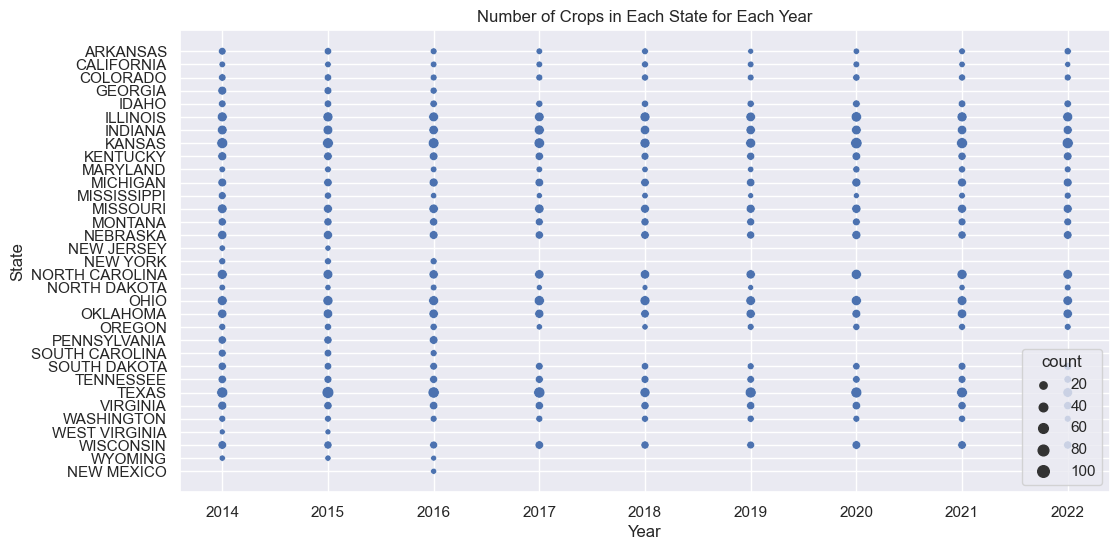

In [29]:
# Count the number of crops in each state for each year
crop_counts = df_merged.groupby(['year', 'state']).size().reset_index(name='count')

# Create a scatter plot using Seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Plot the data
sns.scatterplot(x='year', y='state', size='count', data=crop_counts)

# Customize the plot
plt.title('Number of Crops in Each State for Each Year')
plt.xlabel('Year')
plt.ylabel('State')

# Show the plot
plt.show()


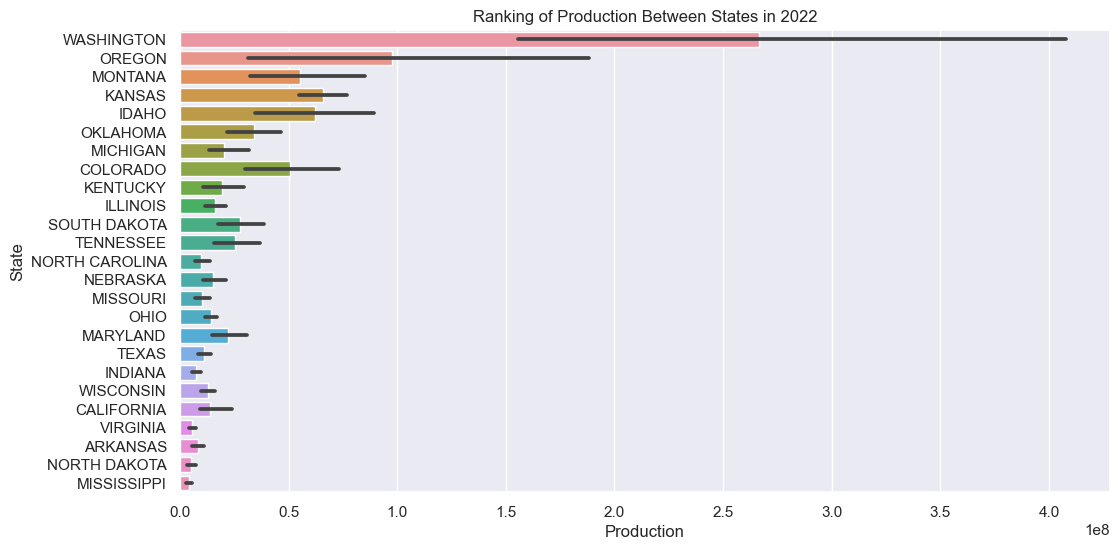

In [34]:
# Filter the data for the year 2022
df_2022 = df_merged[df_merged['year'] == 2022]

# Sort the data by production in descending order
df_2022_sorted = df_2022.sort_values('production', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))

# Plot the data
sns.barplot(y = df_2022_sorted['state'], x = df_2022_sorted['production'], data=df_2022_sorted)

# Customize the plot
plt.title('Ranking of Production Between States in 2022')
plt.xlabel('Production')
plt.ylabel('State')

# Invert the y-axis to display the highest production at the top
#plt.gca().invert_yaxis()

# Show the plot
plt.show()


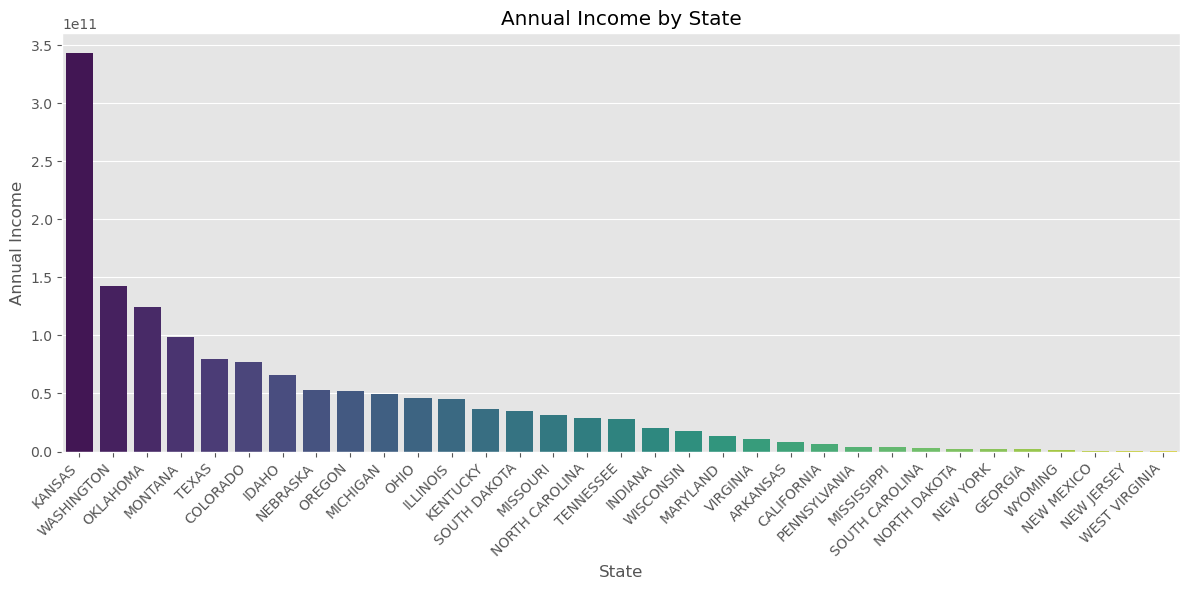

In [30]:
# Group the data by state and calculate the mean yearly income for each state
state_income = df_merged.groupby('state')['yearly_income'].sum().reset_index()

# Sort the states by mean yearly income in descending order
state_income = state_income.sort_values('yearly_income', ascending=False)

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='yearly_income', data=state_income, palette='viridis')

# Customize the plot
plt.title('Annual Income by State')
plt.xlabel('State')
plt.ylabel('Annual Income')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

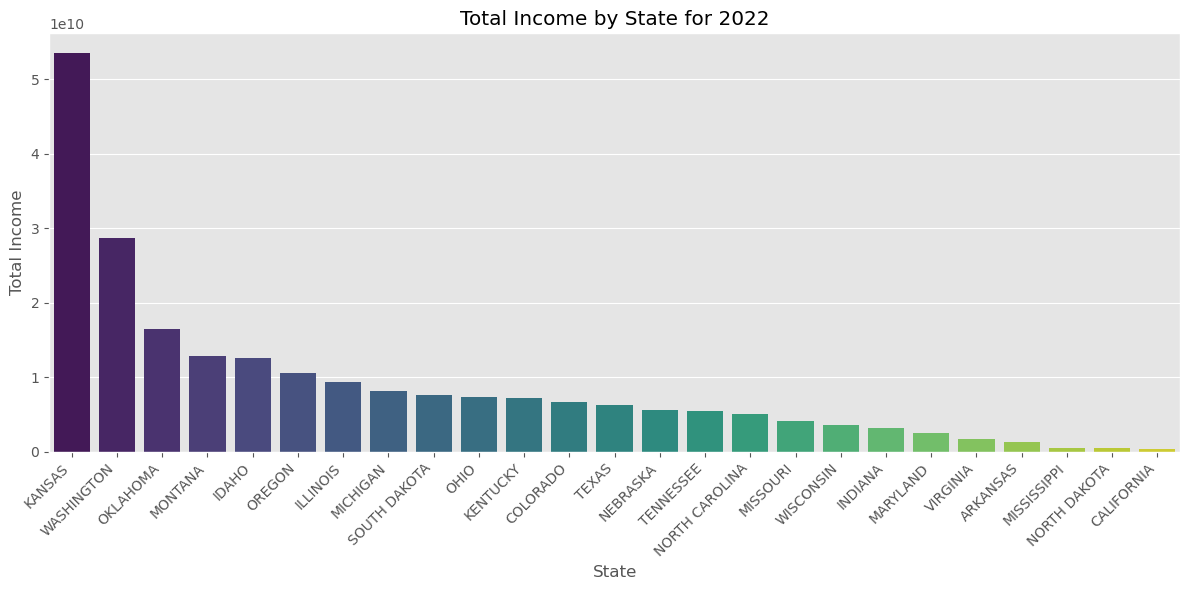

In [37]:
# Filter the DataFrame for the year 2022
df_2022 = df_merged[df_merged['year'] == 2022]

# Calculate the sum income of all counties within each state for 2022
state_sum_income = df_2022.groupby('state')['yearly_income'].sum().reset_index()
state_sum_income = state_sum_income.sort_values('yearly_income', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='yearly_income', data=state_sum_income, palette='viridis')

# Customize the plot
plt.title('Total Income by State for 2022')
plt.xlabel('State')
plt.ylabel('Total Income')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [48]:
ground_df = df_merged[['year', 'state', 'state_ansi','county', 'county_ansi','commodity', 'yield','acres_planted', 'acres_harvested']]
ground_df.head(20)

,year,state,state_ansi,county,county_ansi,commodity,yield,acres_planted,acres_harvested
0,2014,GEORGIA,13,COLQUITT,71,WHEAT,41.7,3500,1800
1,2014,GEORGIA,13,BROOKS,27,WHEAT,46.4,5100,3300
2,2014,GEORGIA,13,MADISON,195,WHEAT,48.0,1300,1000
3,2014,GEORGIA,13,HART,147,WHEAT,58.9,1200,900
4,2014,GEORGIA,13,FRANKLIN,119,WHEAT,47.1,1200,700
5,2014,GEORGIA,13,WALTON,297,WHEAT,26.1,1500,1350
6,2014,GEORGIA,13,SCREVEN,251,WHEAT,48.9,3600,3500
7,2014,GEORGIA,13,JENKINS,165,WHEAT,64.0,1700,1550
8,2014,GEORGIA,13,JEFFERSON,163,WHEAT,52.1,12300,12100
9,2014,GEORGIA,13,BURKE,33,WHEAT,56.5,6300,6300


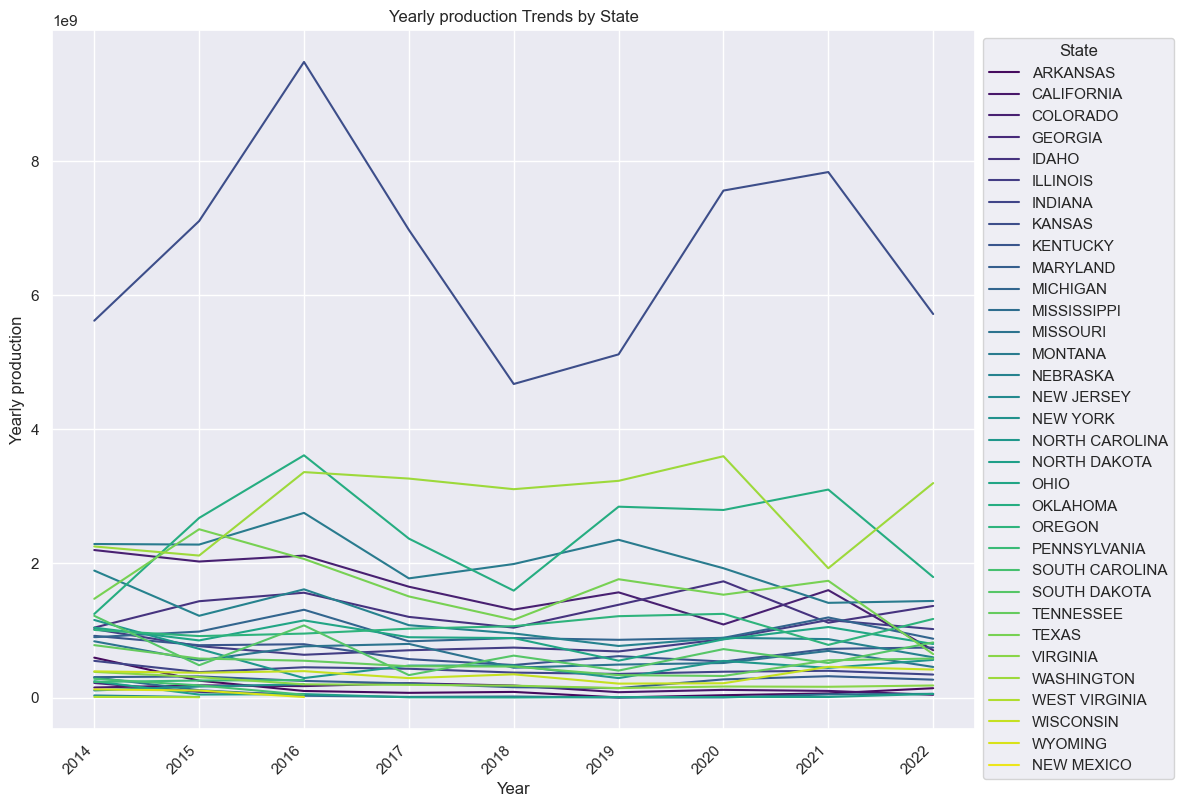

In [41]:
# Group the data by year and state, and calculate the mean yearly income for each combination
yearly_income_by_state = df_merged.groupby(['year', 'state'])['production'].sum().reset_index()

# Plot the line graph
plt.figure(figsize=(12, 8.5))
sns.lineplot(x='year', y='production', hue='state', data=yearly_income_by_state, palette='viridis')

# Customize the plot
plt.title('Yearly production Trends by State')
plt.xlabel('Year')
plt.ylabel('Yearly production')
plt.legend(title='State', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

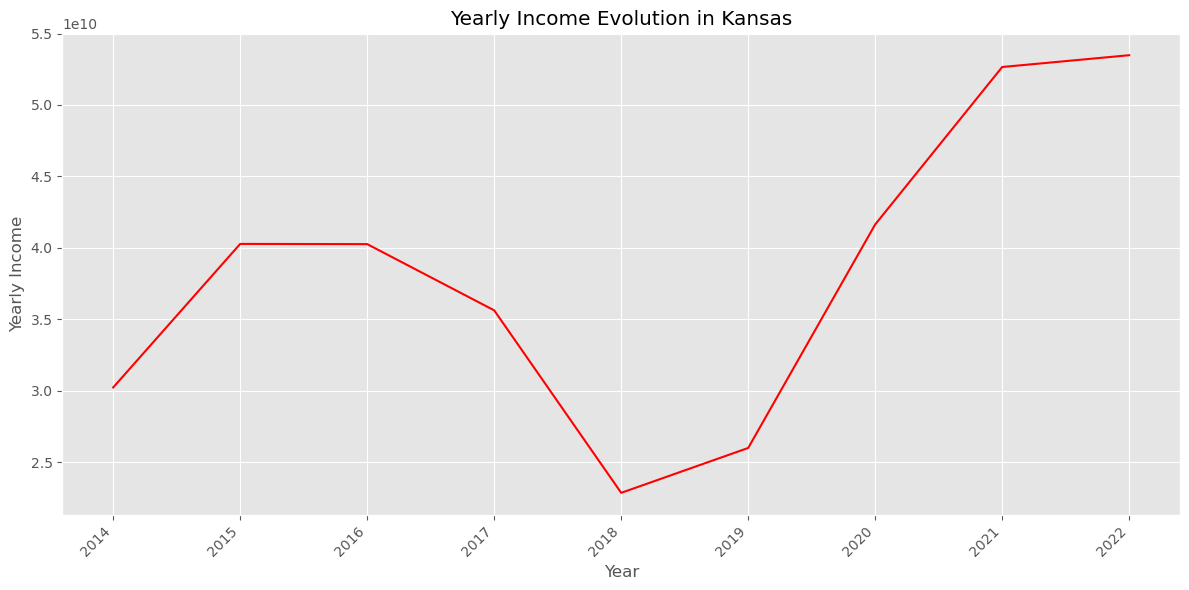

In [48]:
# Filter the DataFrame for the state of Kansas
df_kansas = df_merged[df_merged['state'] == 'KANSAS']

# Group the filtered DataFrame by year and calculate the mean yearly income for each year
yearly_income_kansas = df_kansas.groupby('year')['yearly_income'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(12, 6))
#yearly_income_kansas.plot(kind='line', marker='o', color='blue')
sns.lineplot(x='year', y='yearly_income', data=yearly_income_kansas, color='red')

# Customize the plot
plt.title('Yearly Income Evolution in Kansas')
plt.xlabel('Year')
plt.ylabel('Yearly Income')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
df_merged.columns

Index(['year', 'planting_date', 'harvesting_date', 'state', 'state_ansi',
       'ag_district', 'ag_district_code', 'county', 'county_ansi', 'commodity',
       'acres_planted', 'acres_harvested', 'yield', 'soil_water',
       'soil_carbon', 'soil_density', 'soil_type', 'gdd', 'ehdd', 'ecdd',
       'average_price', 'year_open', 'year_high', 'year_low', 'year_close',
       'harvesting_long_date', 'planting_long_date', 'production', 'loss_perc',
       'crop_health', 'land_use', 'value', 'yearly_income'],
      dtype='object')

In [50]:
df_merged.to_csv(r'data_preperation/data/usda_wheat_COMPLETE_2014_2022.csv', index=False)

In [ ]:
df_sel = df_merged[[#'year', 'planting_date', 'harvesting_date', 'state', 'state_ansi',
       #'ag_district', 'ag_district_code', 'county', 'county_ansi', 'commodity',
       #'acres_planted', 'acres_harvested', 'yield', 
       'soil_water',
       'soil_carbon', 'soil_density', 'soil_type', 'gdd', 'ehdd', 'ecdd',
       #'average_price', 'year_open', 'year_high', 'year_low', 'year_close',
       #'harvesting_long_date', 'planting_long_date', 
       'production', #'loss_perc',
       'crop_health', 'land_use', #'value', 
       'yearly_income']].copy()

- soil_water : percentage of water in the soil in %
- soil_carbon : carbon content in the soil in Grams per KiloGram
- soil_density : soil density in KiloGrams per Metre Cube
- soil_type : soil type or class, there are 12 classes in this dataset
- gdd : Growing Degree Days in celsius
- ehdd : Extreme Heating Degree Days in celsius
- ecdd : Extreme Cooling Degree Days in celsius
- production : production of all crops in the last agricultural season in Kg
- crop_health : the average health of the crop
- land_use : land area cultivated in hectare
- yearly_income : the revenue of all the crops in the last agricultural season in dollars $

### Method 1: Dropping missing values

https://www.youtube.com/shorts/-tcmWp76IYw : video to deal with missing data

In [ ]:
df_sel.shape

In [ ]:
df_prep = pd.DataFrame()

# Assuming your dataset is stored in a DataFrame called 'df'
df_prep = df_sel.dropna().reset_index(drop=True)

print(df_prep.shape)

# Visualize the distribution of NDVI values
#df_prep['01-Oct'].plot.hist(bins=24)
#plt.show()

### Method 2: Filling missing values with a constant

In [ ]:
df_prep = pd.DataFrame()

# Assuming your dataset is stored in a DataFrame called 'df'
df_prep = df_sel.fillna(0)  # Fill missing values with -999

print(df_prep.shape)

# Visualize the distribution of NDVI values
#df_prep['01-Oct'].plot.hist(bins=24)
#plt.show()

### Method 3: Filling missing values with the mean

In [ ]:
df_prep = pd.DataFrame()

for col in df_sel.columns:

    df_prep[col] = df_sel[col].fillna(df_sel[col].mean())

print(df_prep.shape)

# Visualize the distribution of NDVI values
#df_prep['01-Oct'].plot.hist(bins=24)
#plt.show()

### Method 4: Filling missing values with a machine learning approach

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Step 2: Check for empty rows and drop them
df_del = df_sel.dropna(how='all')

ndvi_cols = ['20-Aug', '03-Sep', '17-Sep', '01-Oct', '15-Oct', '29-Oct', '12-Nov', 
             '26-Nov', '10-Dec', '24-Dec', '07-Jan', '21-Jan', '04-Feb', '18-Feb', 
             '04-Mar', '18-Mar', '01-Apr', '15-Apr', '29-Apr', '13-May', '27-May', 
             '10-Jun', '24-Jun', '08-Jul', '22-Jul', '05-Aug', '19-Aug']

# Step 3: Perform machine learning-based imputation
imputer = IterativeImputer()
df_ndvi_prep = pd.DataFrame(imputer.fit_transform(df_del[ndvi_cols]), columns = ndvi_cols)

# Assemble the columns into a new dataframe
df_prep = pd.concat([df_del['Hectar_Planted'], df_ndvi_prep, df_del['Loss_perc']], axis=1)

print(df_prep.shape)

In [ ]:
# Look for duplicates
df_prep.loc[df.duplicated()]

## Step 3: Feature Understanding (Univariate analysis)
- Plotting Feature Distributions
- Histogram
- KDE
- Boxplot

In [ ]:
df_merged['Year'].value_counts()

In [ ]:
ax = df['Year'].value_counts().plot(kind='bar', title='top years wheat crop records in dataset')
ax.set_xlabel('year')
ax.set_ylabel('data records')
plt.show()

## Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

In [ ]:
df.plot(kind='scatter',
        x='Hectare Loss',
        y='Hectare Planted',
        title='Hectare Planted vs. Hectare Loss')
plt.show()

In [ ]:
sns.scatterplot(x='Hectare Loss',
                y='Hectare Planted',
                hue='Year',
                data=df)
plt.show()

In [ ]:
df.plot(kind='scatter',
        x='% of Loss',
        y='Hectare Planted',
        title='Hectare Planted vs. Percentage of Loss')
plt.show()

# Train and Compare

In [ ]:
df_prep.head()

In [ ]:
Target = 'Loss_perc'
Input = ['Hectar_Planted', '20-Aug', '03-Sep', '17-Sep', '01-Oct', '15-Oct', '29-Oct', '12-Nov', 
        '26-Nov', '10-Dec', '24-Dec', '07-Jan', '21-Jan', '04-Feb', '18-Feb', 
        '04-Mar', '18-Mar', '01-Apr', '15-Apr', '29-Apr', '13-May', '27-May', 
        '10-Jun', '24-Jun', '08-Jul', '22-Jul', '05-Aug', '19-Aug']

In [ ]:
from sklearn.model_selection import train_test_split

X = df_prep[Input]  # Features (NDVI timeseries)
y = df_prep['Loss_perc'].values  # Target variable (crop loss)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
import geemap

# Create a map and add the clipped NDVI map
Map = geemap.Map(basemap = 'SATELLITE')

Map.addLayerControl()
# Display the map
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [82]:
import ee
from data_preperation.get_ndvi_data import ras_to_vec

start_date = '2020-01-01'
end_date = '2020-12-31'

# Define the boundary of Thomas County, Kansas
countyBoundary = ee.FeatureCollection('TIGER/2018/Counties') \
    .filter(ee.Filter.eq("STATEFP", '40')) \
    .filter(ee.Filter.eq("COUNTYFP", '027'))

# Load the CropScape data for the year 2022
cropscape = ee.ImageCollection('USDA/NASS/CDL') \
    .filter(ee.Filter.date(start_date, end_date)) \
    .first()

# Select winter wheat (crop code: 3) from the CropScape data
winterWheat = cropscape.select('cropland') \
    .eq(24) \
    .selfMask()

winterWheatClip = winterWheat.clip(countyBoundary)

s2_image = ee.ImageCollection('COPERNICUS/S2_SR') \
    .filterBounds(countyBoundary) \
    .filterDate(start_date, end_date)\
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 5))\
    .mosaic()\
    .clip(countyBoundary)

# Get the list of band names in the image
band_names = s2_image.bandNames().getInfo()

Map.centerObject(countyBoundary)

Map.addLayer(countyBoundary, {},'county')
#Map.addLayer(winterWheatClip, {},'crops')

# Add each band to the map
for band_name in band_names[:13]:
    band = s2_image.select(band_name)
    vis_params = {
        'min': 0,
        'max': 3000,
        'gamma': 1.5
    }
    Map.addLayer(band, vis_params, band_name)